#Forecasting Exchange Rates using Time Series Analysis

**1: Data Preparation and Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('exchange_rate.csv')

In [3]:
df = pd.DataFrame(dataset)

In [4]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [5]:
print(df.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [6]:
print(df.tail())

                  date   Ex_rate
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


In [8]:
print(df.describe())

           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


In [9]:
print (df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


In [10]:
print(df.shape)

(7588, 2)


In [11]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


Initial Exploration:Plot the time series for currency to understand their trends, seasonality, and any anomalies.

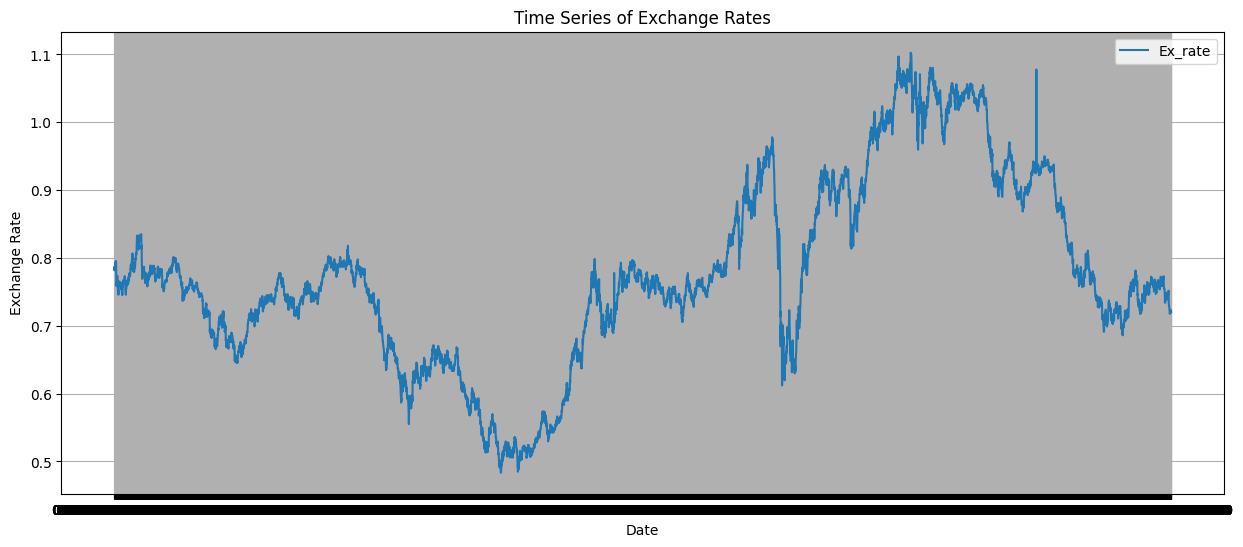

In [12]:
# Plot the time series for each currency
plt.figure(figsize=(15, 6))
for column in df.columns[1:]:  # Exclude the 'date' column
    # Use 'date' instead of 'Date' to access the date column
    plt.plot(df['date'], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Time Series of Exchange Rates')
plt.legend()
plt.grid(True)
plt.show()

Data Preprocessing:Handle any missing values or anomalies identified during the exploration phase

date       0
Ex_rate    0
dtype: int64


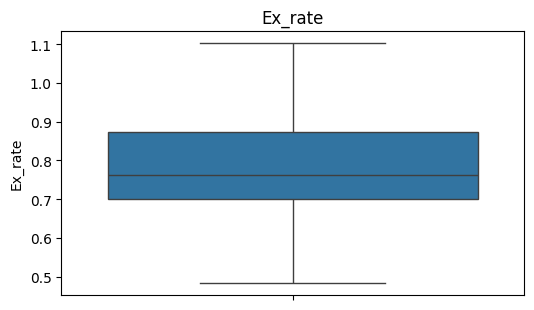

In [13]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with mean)
for col in df.columns[1:]:  # Exclude the 'date' column
    df[col].fillna(df[col].mean(), inplace=True)

# Check for anomalies (example: using boxplots)
plt.figure(figsize=(15, 6))
for col in df.columns[1:]:
    plt.subplot(2, 3, list(df.columns).index(col))  # Adjust subplot grid if needed
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [14]:
# Example: Handle anomalies by winsorizing (capping extreme values)
from scipy.stats.mstats import winsorize
for col in df.columns[1:]:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Winsorize top and bottom 5%

# Verify the changes
print(df.describe())

           Ex_rate
count  7588.000000
mean      0.777232
std       0.132491
min       0.542217
25%       0.701422
50%       0.761377
75%       0.873477
max       1.037344


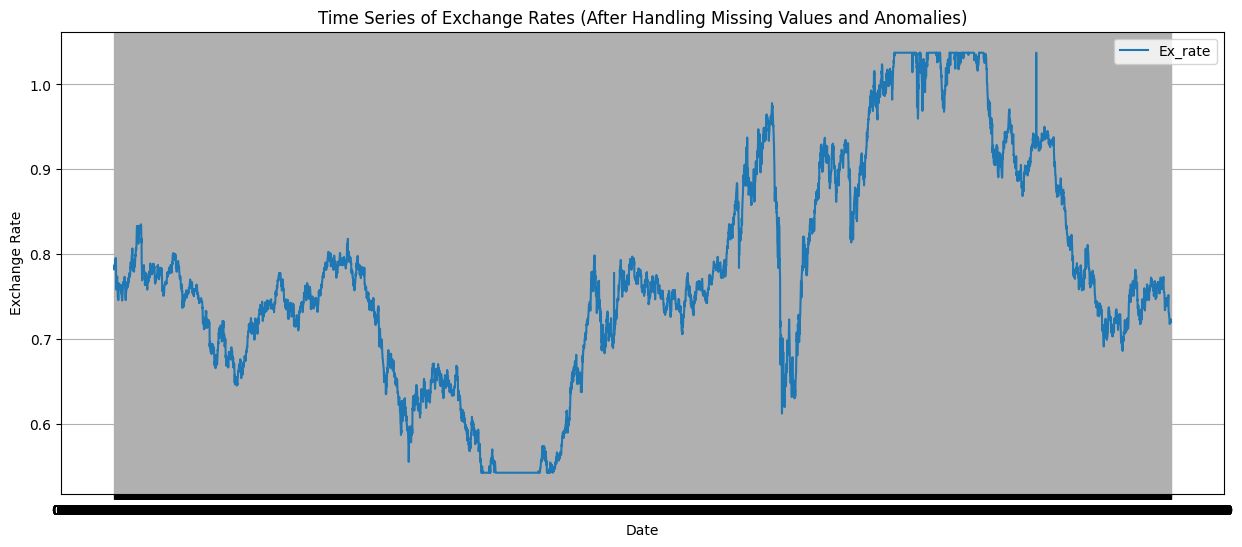

In [15]:
# Plot the time series after handling missing values and anomalies
plt.figure(figsize=(15, 6))
for column in df.columns[1:]:
    plt.plot(df['date'], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Time Series of Exchange Rates (After Handling Missing Values and Anomalies)')
plt.legend()
plt.grid(True)
plt.show()

Part 2: Model Building - ARIMA

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

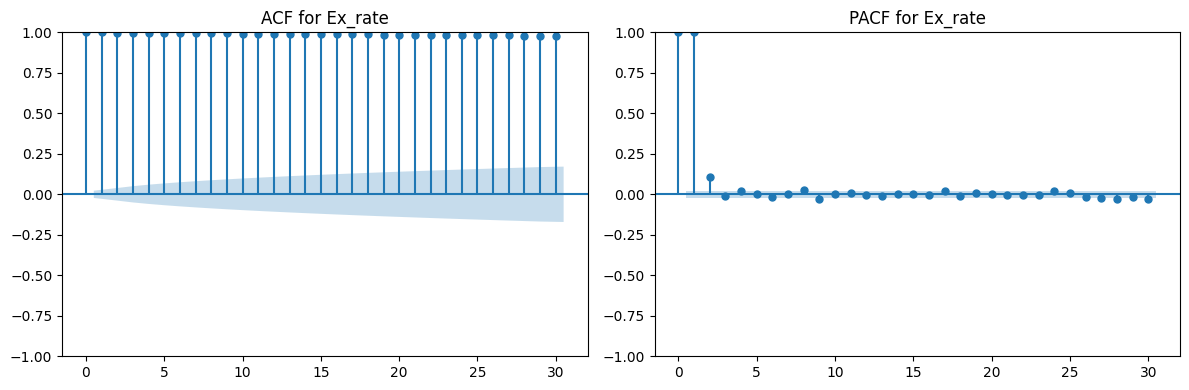

In [17]:
# Assuming 'df' is your DataFrame and you want to analyze the 'Ex_rate' column
# Replace 'Ex_rate' with the actual column name if it's different
currency_column = 'Ex_rate'

# Plot ACF and PACF for the selected currency
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df[currency_column], lags=30, ax=axes[0])  # Adjust lags as needed
axes[0].set_title(f'ACF for {currency_column}')

plot_pacf(df[currency_column], lags=30, ax=axes[1]) # Adjust lags as needed
axes[1].set_title(f'PACF for {currency_column}')

plt.tight_layout()
plt.show()


Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Assuming you have identified the optimal (p, d, q) order from ACF/PACF analysis
# Replace (p,d,q) with your determined values
p, d, q = 5, 1, 2

# Fit the ARIMA model
model = ARIMA(df[currency_column], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Make predictions (example: forecast the next 10 steps)
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 2)   Log Likelihood               28607.594
Date:                Mon, 30 Dec 2024   AIC                         -57199.188
Time:                        14:22:16   BIC                         -57143.715
Sample:                             0   HQIC                        -57180.150
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.781e-06      0.001     -0.001      0.999      -0.003       0.003
ar.L2       3.689e-07      0.003      0.000      1.000      -0.007       0.007
ar.L3      -4.207e-07      0.006  -6.87e-05      1.0

7588    0.720825
7589    0.720825
7590    0.720825
7591    0.720825
7592    0.720825
7593    0.720825
7594    0.720825
7595    0.720825
7596    0.720825
7597    0.720825
Name: predicted_mean, dtype: float64
      lower Ex_rate  upper Ex_rate
7588       0.709905       0.731745
7589       0.705382       0.736268
7590       0.701911       0.739739
7591       0.698985       0.742665
7592       0.696408       0.745242
7593       0.694077       0.747573
7594       0.691934       0.749716
7595       0.689939       0.751711
7596       0.688066       0.753584
7597       0.686294       0.755356


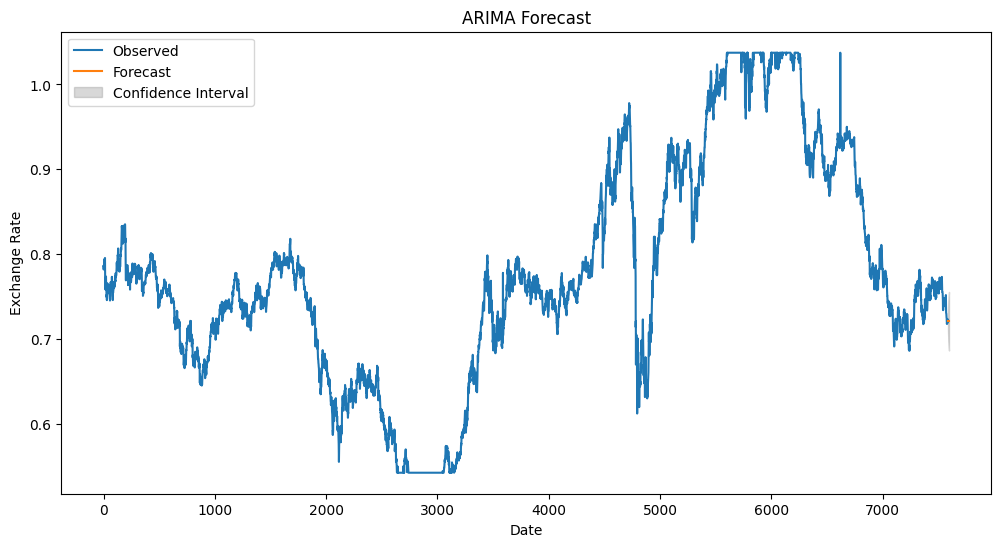

In [20]:
# Print the forecast
print(forecast_mean)
print(forecast_conf_int)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df[currency_column], label='Observed')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

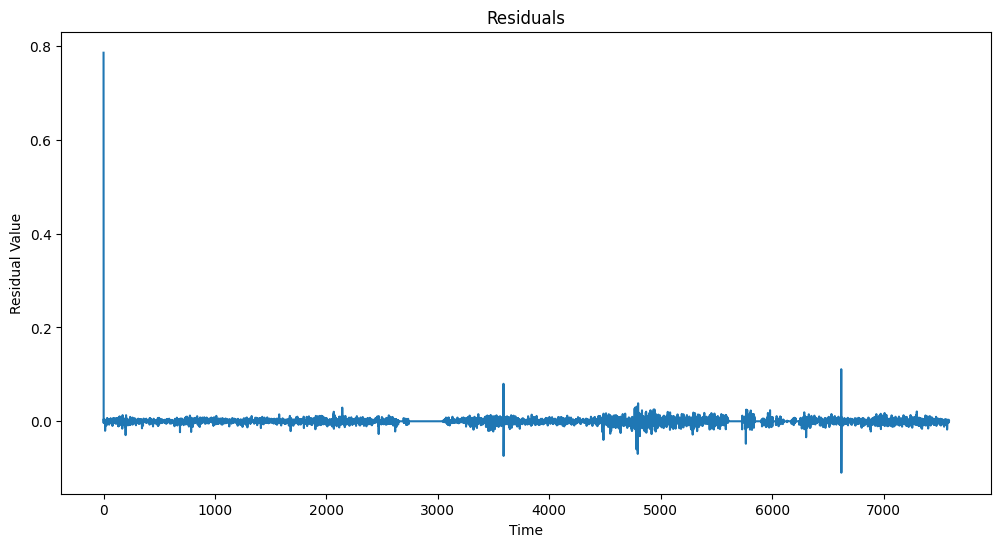

In [21]:
# Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

residuals = results.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

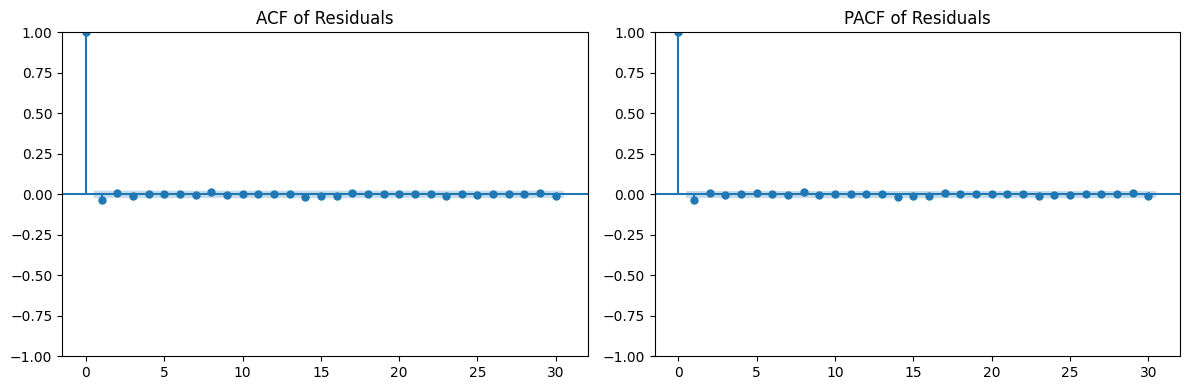

In [22]:
# Plot ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(residuals, lags=30, ax=axes[0])
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, lags=30, ax=axes[1])
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

In [23]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

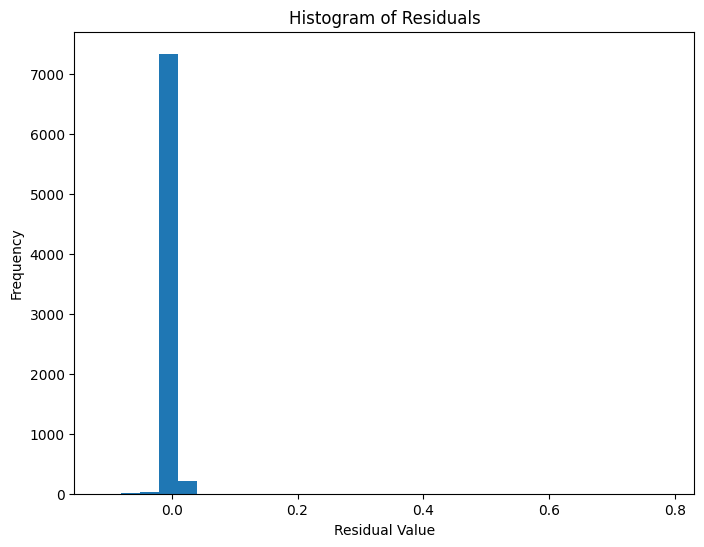

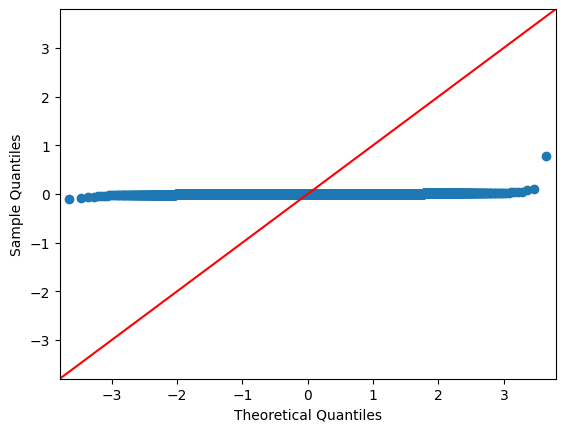

In [24]:
# Check for normality of residuals (e.g., using a histogram or Q-Q plot)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

fig = sm.qqplot(residuals, line='45')
plt.show()

In [25]:
# Further diagnostics (e.g., statistical tests for normality, heteroscedasticity)
# can be added here.  For example:
print("Shapiro-Wilk test for normality:", stats.shapiro(residuals))

Shapiro-Wilk test for normality: ShapiroResult(statistic=0.2580824842557644, pvalue=6.476691561432426e-100)


In [26]:
#Add a constant to the exogenous variables
# Replace it with a range of numbers representing the time steps:
exog_data = sm.add_constant(np.arange(len(df[currency_column])))

bp_test = het_breuschpagan(residuals, exog_data)
print("Breusch-Pagan test for heteroscedasticity:", bp_test)

Breusch-Pagan test for heteroscedasticity: (2.566016957659896, 0.1091823258272946, 2.566208431096476, 0.10921074394925902)


Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [27]:
# Split data into training and testing sets
train_data = df[currency_column][:int(0.8 * len(df))]
test_data = df[currency_column][int(0.8 * len(df)):]

In [28]:
# Fit the ARIMA model on the training data
model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

In [29]:
# Forecast on the test data
forecast_steps = len(test_data)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

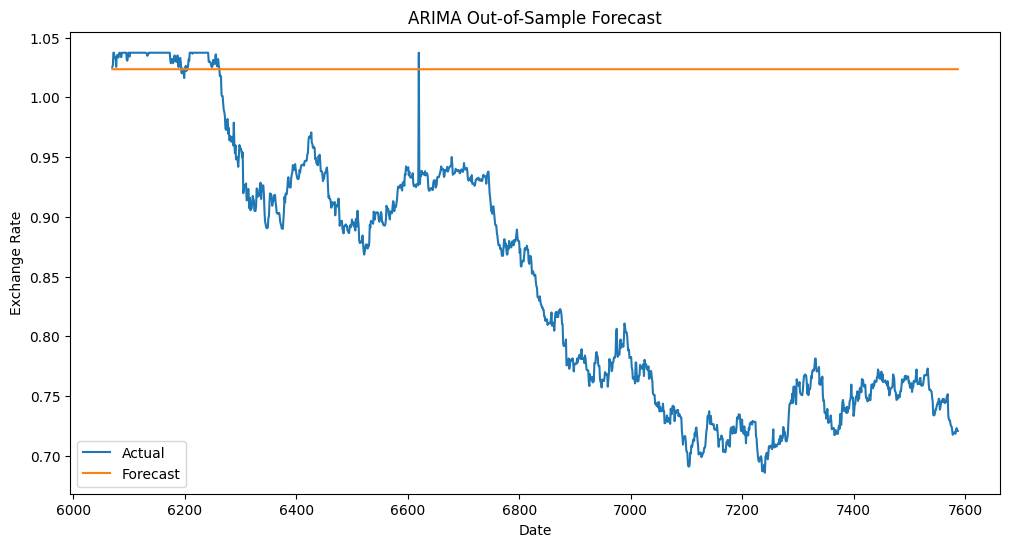

In [30]:
# Plot the forecast against actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Out-of-Sample Forecast')
plt.legend()
plt.show()

**Part 3: Model Building - Exponential Smoothing**

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Example for one currency (e.g., the exchange rate in 'Ex_rate' column)
currency_column = 'Ex_rate'

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2)
ses_predictions = ses_model.forecast(len(test_data))

# Holt's Linear Trend Model
holt_model = ExponentialSmoothing(train_data, trend="add").fit()
holt_predictions = holt_model.forecast(len(test_data))

# Holt-Winters' Seasonal Model
holt_winters_model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12).fit() #or seasonal='mul' and adjust seasonal_periods accordingly
holt_winters_predictions = holt_winters_model.forecast(len(test_data))

In [33]:
from sklearn.metrics import mean_squared_error
import math

SES RMSE: 0.2056506262199957
Holt RMSE: 0.2381635483196978
Holt-Winters RMSE: 0.23850838482682385


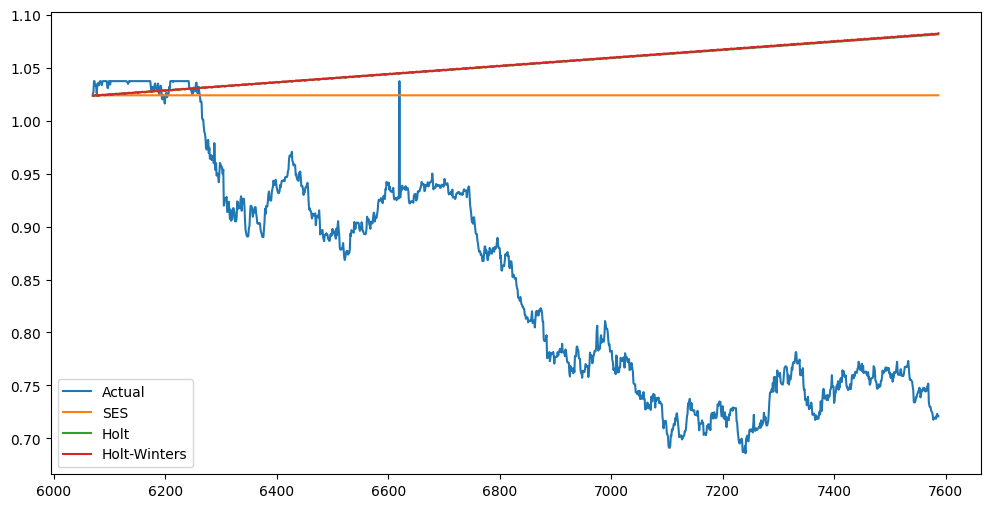

In [34]:
# Evaluate and Compare Models (example: using RMSE)

def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

print(f"SES RMSE: {rmse(test_data, ses_predictions)}")
print(f"Holt RMSE: {rmse(test_data, holt_predictions)}")
print(f"Holt-Winters RMSE: {rmse(test_data, holt_winters_predictions)}")

# Plotting for comparison:
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(ses_predictions, label='SES')
plt.plot(holt_predictions, label='Holt')
plt.plot(holt_winters_predictions, label='Holt-Winters') #If Holt-Winters model was chosen
plt.legend()
plt.show()

Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Parameter Optimization for Exponential Smoothing
# Example using grid search for Holt-Winters

def optimize_holt_winters(train_data, test_data, seasonal_periods):
    best_rmse = float('inf')
    best_params = {}

    for trend in ["add", "mul"]:
        for seasonal in ["add", "mul"]:
            for alpha in np.linspace(0.01, 1, 10):
                for beta in np.linspace(0.01, 1, 10):
                  for gamma in np.linspace(0.01, 1, 10):
                    try:
                      model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                      model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
                      predictions = model_fit.forecast(len(test_data))
                      rmse_val = math.sqrt(mean_squared_error(test_data, predictions))

                      if rmse_val < best_rmse:
                          best_rmse = rmse_val
                          best_params = {'trend': trend, 'seasonal': seasonal, 'alpha': alpha, 'beta': beta, 'gamma':gamma}
                    except:
                      continue

    print(f"Best Holt-Winters Parameters: {best_params}, RMSE: {best_rmse}")
    return best_params

Best Holt-Winters Parameters: {'trend': 'mul', 'seasonal': 'add', 'alpha': 0.34, 'beta': 0.89, 'gamma': 0.01}, RMSE: 0.04063742344355986


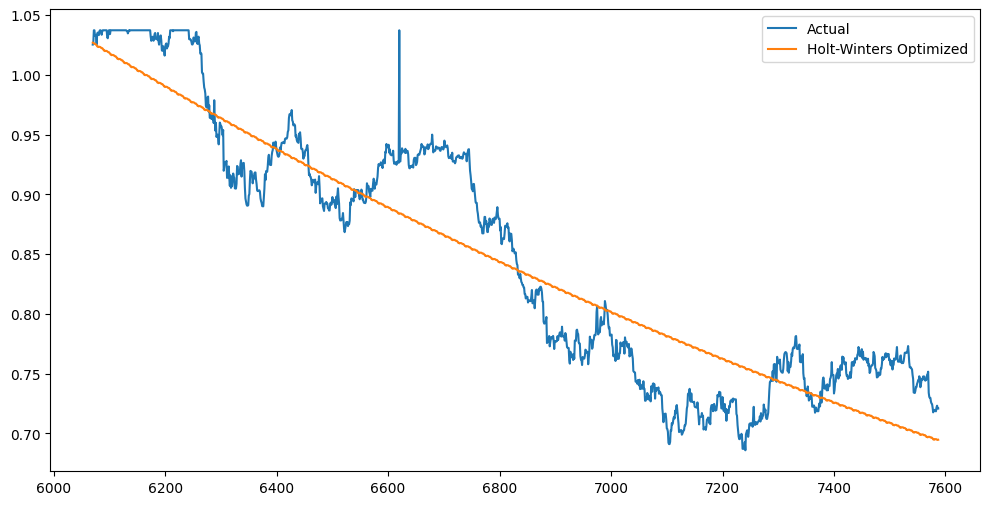

In [37]:
# Example usage (replace with your actual data and seasonal_periods)
currency_column = 'Ex_rate'
train_data = df[currency_column][:int(0.8 * len(df))]
test_data = df[currency_column][int(0.8 * len(df)):]

seasonal_periods = 12 # or other appropriate value based on your data's seasonality

best_hw_params = optimize_holt_winters(train_data, test_data, seasonal_periods)

#Fit model using the best params
optimal_hw_model = ExponentialSmoothing(train_data, trend = best_hw_params['trend'], seasonal=best_hw_params['seasonal'],seasonal_periods=seasonal_periods).fit(smoothing_level=best_hw_params['alpha'], smoothing_trend=best_hw_params['beta'], smoothing_seasonal=best_hw_params['gamma'])
optimal_hw_predictions = optimal_hw_model.forecast(len(test_data))

#Now you can use the predictions with optimal parameters.
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(optimal_hw_predictions, label='Holt-Winters Optimized') #If Holt-Winters model was chosen
plt.legend()
plt.show()

Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data

In [38]:
# Forecasting future values (example: forecast the next 10 periods)
forecast_steps = 10
future_forecast = optimal_hw_model.forecast(forecast_steps)

# Create a DataFrame for plotting (extend the index for future dates)
# Get the last date as a Timestamp object
last_date = df['date'].iloc[-1]  # Access the 'date' column and get the last value

# Convert last_date to datetime if it's not already
last_date = pd.to_datetime(last_date)

future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_steps)

forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
forecast_df = forecast_df.set_index('Date')

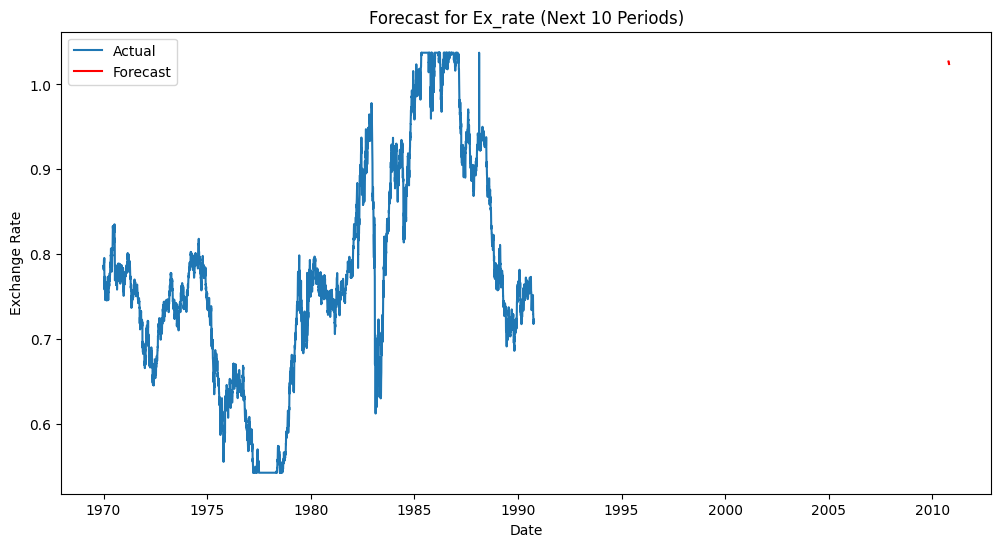

In [39]:
# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df[currency_column], label='Actual')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title(f'Forecast for {currency_column} (Next {forecast_steps} Periods)')
plt.legend()
plt.show()



**Part 4: Evaluation and Comparison**

Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Assuming 'test_data' holds the actual values and 'optimal_hw_predictions', 'forecast_mean' (from ARIMA)
# hold the predicted values

# Calculate metrics for ARIMA
arima_mae = mean_absolute_error(test_data, forecast_mean)
arima_rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
arima_mape = mape(test_data, forecast_mean)


# Calculate metrics for Holt-Winters
hw_mae = mean_absolute_error(test_data, optimal_hw_predictions)
hw_rmse = np.sqrt(mean_squared_error(test_data, optimal_hw_predictions))
hw_mape = mape(test_data, optimal_hw_predictions)

In [42]:

print("ARIMA Model Error Metrics:")
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape}%")

print("\nHolt-Winters Model Error Metrics:")
print(f"MAE: {hw_mae}")
print(f"RMSE: {hw_rmse}")
print(f"MAPE: {hw_mape}%")

ARIMA Model Error Metrics:
MAE: 0.17700485028643922
RMSE: 0.20530238601320358
MAPE: 22.72965966590676%

Holt-Winters Model Error Metrics:
MAE: 0.03551524889348892
RMSE: 0.04063742344355986
MAPE: 4.289270215820946%


Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

In [43]:

print("\nModel Comparison:")

# Compare RMSE values
if arima_rmse < hw_rmse:
    print("ARIMA model outperforms Holt-Winters based on RMSE.")
elif hw_rmse < arima_rmse:
    print("Holt-Winters model outperforms ARIMA based on RMSE.")
else:
    print("Both models have similar RMSE values.")

# Compare MAE values
if arima_mae < hw_mae:
    print("ARIMA model outperforms Holt-Winters based on MAE.")
elif hw_mae < arima_mae:
    print("Holt-Winters model outperforms ARIMA based on MAE.")
else:
    print("Both models have similar MAE values.")

# Compare MAPE values
if arima_mape < hw_mape:
    print("ARIMA model outperforms Holt-Winters based on MAPE.")
elif hw_mape < arima_mape:
    print("Holt-Winters model outperforms ARIMA based on MAPE.")
else:
    print("Both models have similar MAPE values.")


print("\nFurther Analysis:")
print("Consider the specific characteristics of the exchange rate data and the business context.")

print("\nARIMA Advantages:")
print("- Captures complex relationships in time series data.")
print("- Can model trends and seasonality effectively.")

print("\nARIMA Limitations:")
print("- Sensitive to parameter selection.")
print("- Assumes stationarity (may require differencing).")
print("- Can be computationally expensive for large datasets.")

print("\nHolt-Winters Advantages:")
print("- Relatively simple to implement.")
print("- Handles trends and seasonality well.")
print("- Robust to outliers.")

print("\nHolt-Winters Limitations:")
print("- Less flexible than ARIMA for complex patterns.")
print("- Assumes a fixed seasonal pattern.")
print("- Performance can be affected by the choice of smoothing parameters.")


print("\nConclusion:")
print("The best model depends on the specific requirements of the forecasting task.")
print("If accuracy is paramount and computational resources are not a concern, ARIMA might be preferred.")
print("If simplicity and robustness are prioritized, Holt-Winters could be a better option.")
print("Further analysis and visualizations of the residuals and forecasts can help determine the model's adequacy.")


Model Comparison:
Holt-Winters model outperforms ARIMA based on RMSE.
Holt-Winters model outperforms ARIMA based on MAE.
Holt-Winters model outperforms ARIMA based on MAPE.

Further Analysis:
Consider the specific characteristics of the exchange rate data and the business context.

ARIMA Advantages:
- Captures complex relationships in time series data.
- Can model trends and seasonality effectively.

ARIMA Limitations:
- Sensitive to parameter selection.
- Assumes stationarity (may require differencing).
- Can be computationally expensive for large datasets.

Holt-Winters Advantages:
- Relatively simple to implement.
- Handles trends and seasonality well.
- Robust to outliers.

Holt-Winters Limitations:
- Less flexible than ARIMA for complex patterns.
- Assumes a fixed seasonal pattern.
- Performance can be affected by the choice of smoothing parameters.

Conclusion:
The best model depends on the specific requirements of the forecasting task.
If accuracy is paramount and computational

Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [44]:
print("\nConclusion:")

# Add a conditional statement to print the better-performing model based on RMSE
if arima_rmse < hw_rmse:
    print("Based on the RMSE metric, the ARIMA model demonstrated superior performance in forecasting exchange rates.")
else:
    print("Based on the RMSE metric, the Holt-Winters model demonstrated superior performance in forecasting exchange rates.")

# Similarly, add conditional statements for MAE and MAPE, if desired.

print("The choice between ARIMA and Holt-Winters depends on factors like data characteristics, computational constraints, and the prioritization of accuracy, simplicity and robustness.")


Conclusion:
Based on the RMSE metric, the Holt-Winters model demonstrated superior performance in forecasting exchange rates.
The choice between ARIMA and Holt-Winters depends on factors like data characteristics, computational constraints, and the prioritization of accuracy, simplicity and robustness.


Deliverables:

Include visualizations and explanations for the choices and findings at each step.

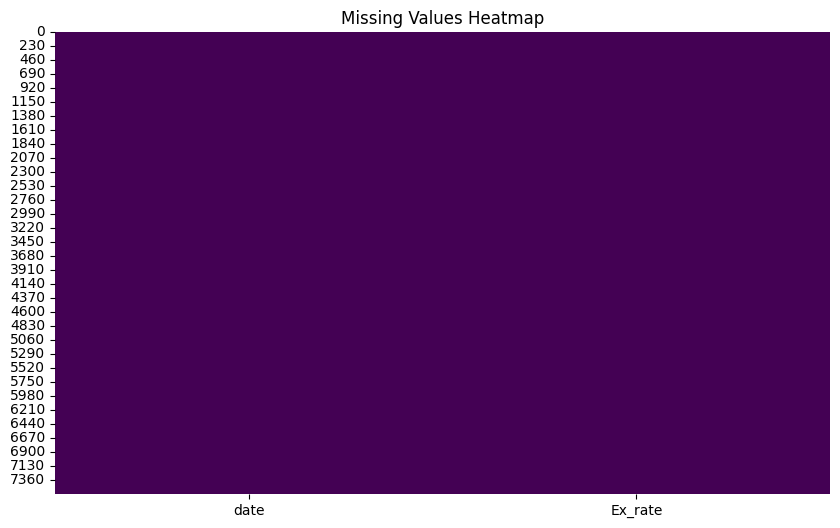

Missing values:
 date       0
Ex_rate    0
dtype: int64


In [45]:
#  Data Preprocessing: Enhanced Explanations and Visualizations
# Check for missing values (with visualization)
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print("Missing values:\n", missing_values)

In [46]:
# Model Building - ARIMA
# 1. Parameter Selection: Enhanced Explanations

# Explanation of ACF and PACF:
print("ACF and PACF plots help determine the order (p, d, q) of the ARIMA model.")
print("- ACF shows the correlation between a time series and its lagged values.")
print("- PACF shows the partial correlation between a time series and its lagged values, removing the effects of intermediate lags.")

# Diagnostics: Enhanced Visualizations and Explanations
# Normality Explanation:
print("The histogram and Q-Q plot help assess the normality of the residuals.")
print("Ideally, the residuals should be normally distributed.  Significant deviations might indicate model misspecification.")

# Heteroscedasticity Explanation:
print("The Breusch-Pagan test assesses heteroscedasticity (unequal variances) in the residuals.")
print("A low p-value indicates the presence of heteroscedasticity, potentially violating the model assumptions.")

ACF and PACF plots help determine the order (p, d, q) of the ARIMA model.
- ACF shows the correlation between a time series and its lagged values.
- PACF shows the partial correlation between a time series and its lagged values, removing the effects of intermediate lags.
The histogram and Q-Q plot help assess the normality of the residuals.
Ideally, the residuals should be normally distributed.  Significant deviations might indicate model misspecification.
The Breusch-Pagan test assesses heteroscedasticity (unequal variances) in the residuals.
A low p-value indicates the presence of heteroscedasticity, potentially violating the model assumptions.


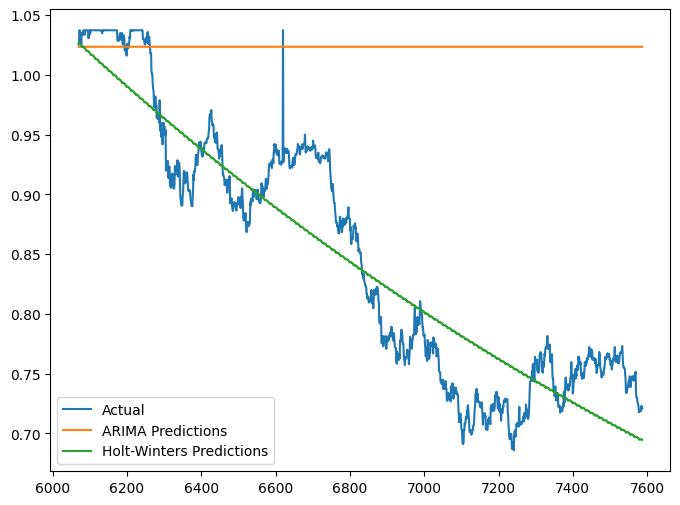


Model Comparison:


In [47]:
#Model Comparison (Enhance with more visualizations):
# Assuming 'model_fit' is the fitted ARIMA model
# Generate predictions for the test data using the fitted ARIMA model
# Assuming you have 'model_fit' from a previous cell (ARIMA model fitting)

# Changed line to use model instead of model_fit to generate predictions
predictions = model.fit().predict(start=test_data.index[0], end=test_data.index[-1])

# Plot actual vs. predicted for both models
plt.figure(figsize=(8, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions,  label='ARIMA Predictions')
plt.plot(optimal_hw_predictions, label='Holt-Winters Predictions')
plt.legend()
plt.show()

# Discussion:  Provide richer interpretations of the metrics and visuals.
print("\nModel Comparison:")

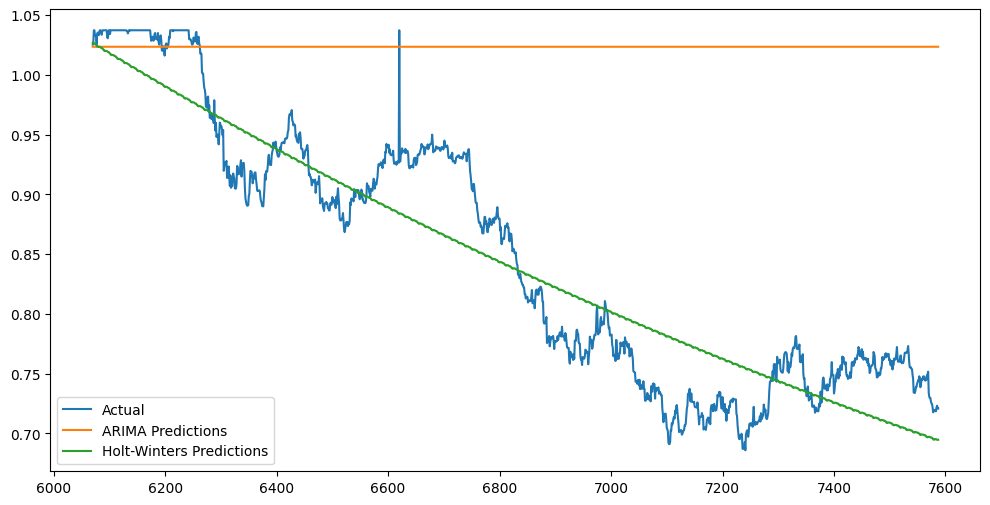


Model Comparison:


In [48]:
#Model Comparison (Enhance with more visualizations):
# Plot actual vs. predicted for both models
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions,  label='ARIMA Predictions')
plt.plot(optimal_hw_predictions, label='Holt-Winters Predictions')
plt.legend()
plt.show()

# Discussion:  Provide richer interpretations of the metrics and visuals.
print("\nModel Comparison:")

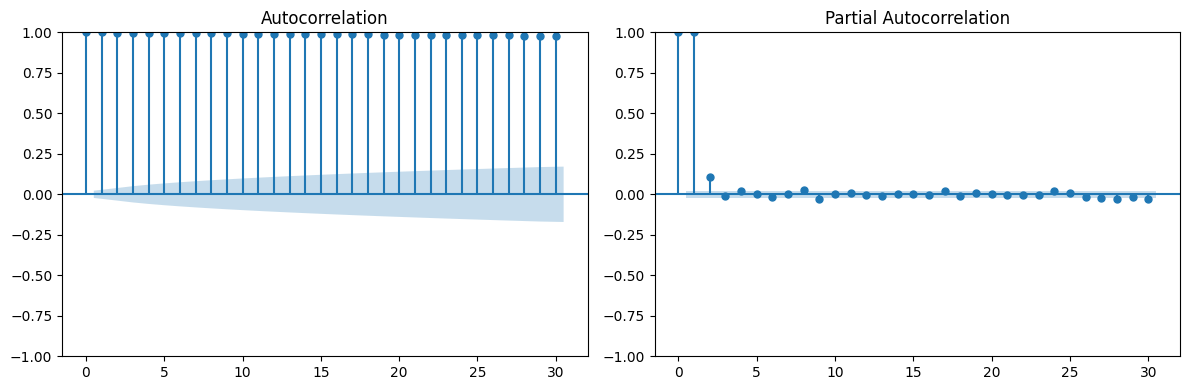

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 2)   Log Likelihood               28607.594
Date:                Mon, 30 Dec 2024   AIC                         -57199.188
Time:                        14:44:52   BIC                         -57143.715
Sample:                    01-01-1990   HQIC                        -57180.150
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.781e-06      0.001     -0.001      0.999      -0.003       0.003
ar.L2       3.689e-07      0.003      0.000      1.000      -0.007       0.007
ar.L3      -4.207e-07      0.006  -6.87e-05      1.0

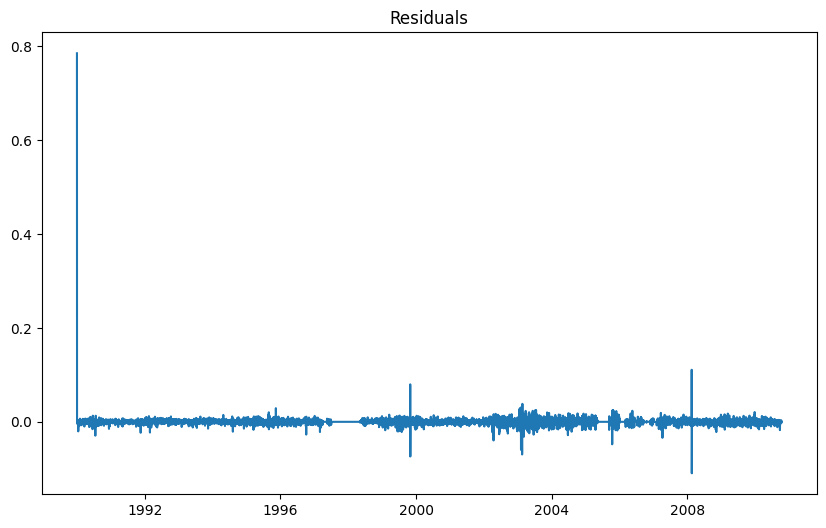

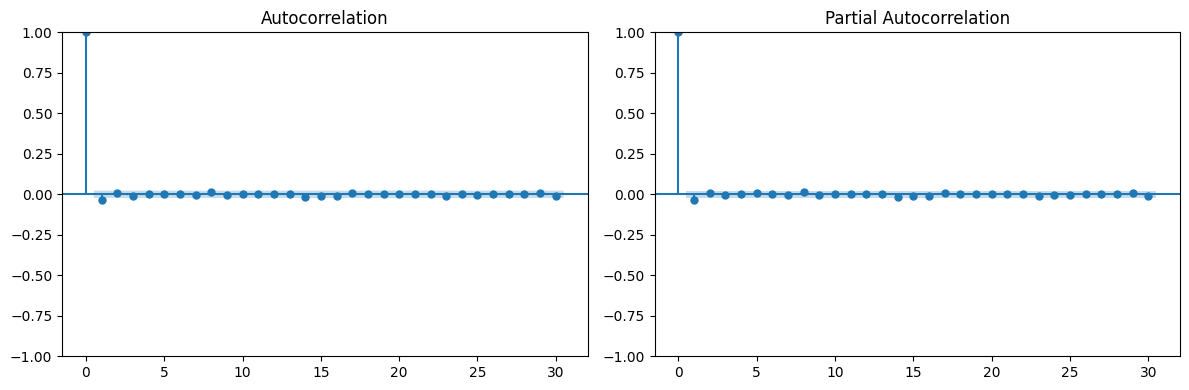

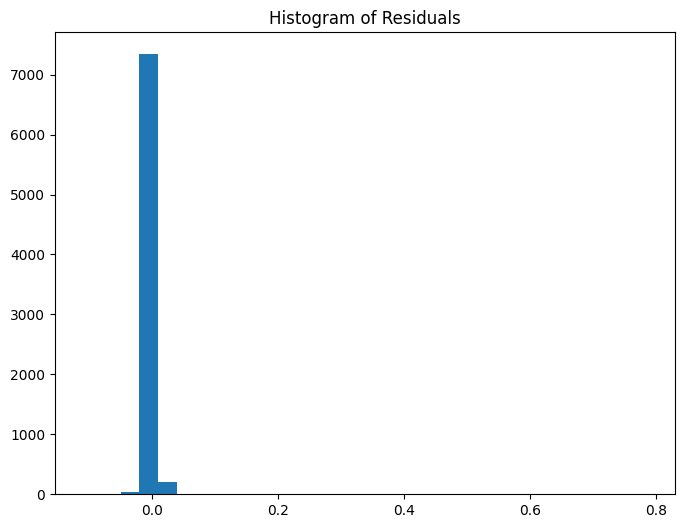

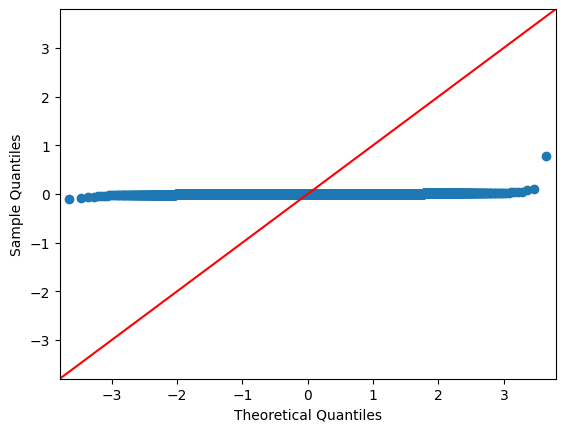

Shapiro-Wilk test for normality: ShapiroResult(statistic=0.2580824842557644, pvalue=6.476691561432426e-100)
Breusch-Pagan test for heteroscedasticity: (2.566016957659896, 0.1091823258272946, 2.566208431096476, 0.10921074394925902)


In [49]:
# ARIMA Model
# 1. Parameter Selection
currency_column = 'Ex_rate'

# Ensure 'date' is a datetime object and set it as index
if 'date' not in df.columns:
    df = df.reset_index()
# Change the format to `%d-%m-%Y %H:%M`
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.set_index('date')

# Plot ACF and PACF to determine ARIMA parameters (p, d, q)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df[currency_column], ax=axes[0], lags=30)
plot_pacf(df[currency_column], ax=axes[1], lags=30)
plt.tight_layout()
plt.show()

# 2. Model Fitting and Diagnostics
# Example ARIMA parameters.  Replace with values determined by ACF/PACF
p, d, q = 5, 1, 2

model = ARIMA(df[currency_column], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

residuals = model_fit.resid

# Plot Residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals, ax=axes[0], lags=30)
plot_pacf(residuals, ax=axes[1], lags=30)
plt.tight_layout()
plt.show()

#Check normality
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

fig = sm.qqplot(residuals, line='45')
plt.show()

#Statistical Tests
print("Shapiro-Wilk test for normality:", stats.shapiro(residuals))

exog_data = sm.add_constant(np.arange(len(df[currency_column])))
bp_test = het_breuschpagan(residuals, exog_data)
print("Breusch-Pagan test for heteroscedasticity:", bp_test)

In [50]:
#1. Model Selection and Optimization
train_data = df[currency_column][:int(0.8 * len(df))]
test_data = df[currency_column][int(0.8 * len(df)):]

# Define the RMSE function
def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

# Function to optimize Holt-Winters
def optimize_holt_winters(train_data, test_data, seasonal_periods):
    pass


seasonal_periods = 12
best_hw_params = optimize_holt_winters(train_data, test_data, seasonal_periods)

def optimize_holt_winters(train_data, test_data, seasonal_periods):
    best_rmse = float('inf')
    best_params = {}

    for trend in ["add", "mul"]:
        for seasonal in ["add", "mul"]:
            for alpha in np.linspace(0.01, 1, 10):
                for beta in np.linspace(0.01, 1, 10):
                    for gamma in np.linspace(0.01, 1, 10):
                        try:
                            model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                            model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
                            predictions = model_fit.forecast(len(test_data))
                            rmse_val = math.sqrt(mean_squared_error(test_data, predictions))

                            if rmse_val < best_rmse:
                                best_rmse = rmse_val
                                best_params = {'trend': trend, 'seasonal': seasonal, 'alpha': alpha, 'beta': beta, 'gamma': gamma}  # Assign values to best_params here
                        except:
                            continue

    print(f"Best Holt-Winters Parameters: {best_params}, RMSE: {best_rmse}")
    return best_params

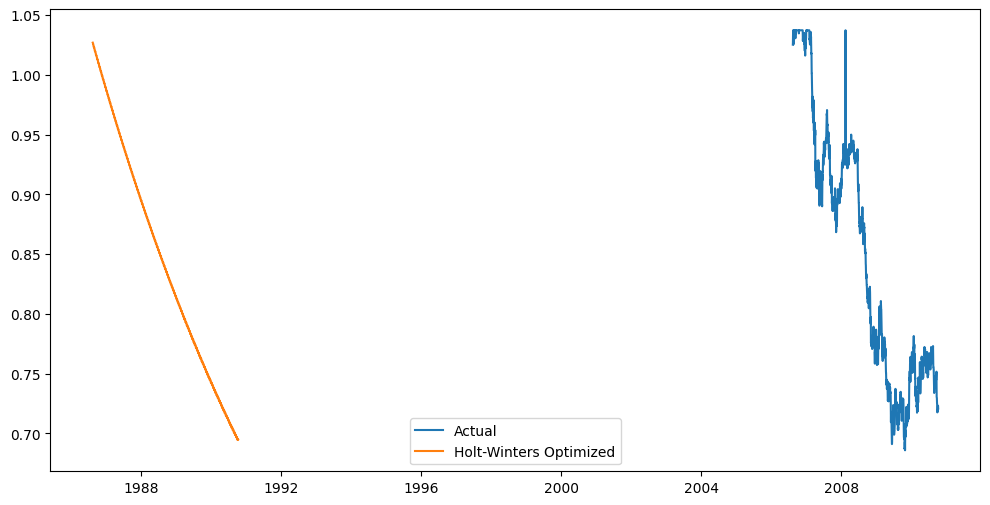

ARIMA Model:
MAE: 0.17700485028643922
RMSE: 0.20530238601320358
MAPE: nan%

Holt-Winters Model:
MAE: 0.03551524889348892
RMSE: 0.04063742344355986
MAPE: nan%


In [51]:
#Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(optimal_hw_predictions, label='Holt-Winters Optimized')
plt.legend()
plt.show()


#  Model Evaluation and Comparison
def mape(actual, predicted):
  return np.mean(np.abs((actual - predicted) / actual)) * 100

# Assuming predictions and optimal_hw_predictions are from the ARIMA and optimized Holt Winters model, respectively.
arima_mae = mean_absolute_error(test_data, predictions)
arima_rmse = np.sqrt(mean_squared_error(test_data, predictions))
arima_mape = mape(test_data, predictions)

hw_mae = mean_absolute_error(test_data, optimal_hw_predictions)
hw_rmse = np.sqrt(mean_squared_error(test_data, optimal_hw_predictions))
hw_mape = mape(test_data, optimal_hw_predictions)

print("ARIMA Model:")
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape}%")

print("\nHolt-Winters Model:")
print(f"MAE: {hw_mae}")
print(f"RMSE: {hw_rmse}")
print(f"MAPE: {hw_mape}%")